In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, roc_auc_score


# **Data Wrangling**

In [ ]:
# Load data
df = pd.read_csv('/content/heart_disease.csv')

• **age**: Age of the patient.

• **sex**: Sex of the patient (1 = male, 0 = female).

• **cp**: Chest pain type (0-3).

• **trestbps**: Resting blood pressure.

• **chol**: Serum cholesterol in mg/dl.

• **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

• **restecg**: Resting electrocardiographic results (0-2).

• **thalach**: Maximum heart rate achieved.

• **exang**: Exercise induced angina (1 = yes; 0 = no).

• **oldpeak**: ST depression induced by exercise relative to rest.

• slope: The slope of the peak exercise ST segment.

• **ca**: Number of major vessels (0-3) colored by fluoroscopy.

• **thal**: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

• **target**: Diagnosis of heart disease (1 = presence of heart disease; 0 = absence).

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# **Exploratory Data Analysis**

In [ ]:
# Create a new column 'sex_label' for better readability in the pie chart
df['sex_label'] = df['sex'].map({1: 'Male', 0: 'Female'})
# Count the occurrences of each sex
sex_counts = df['sex_label'].value_counts()

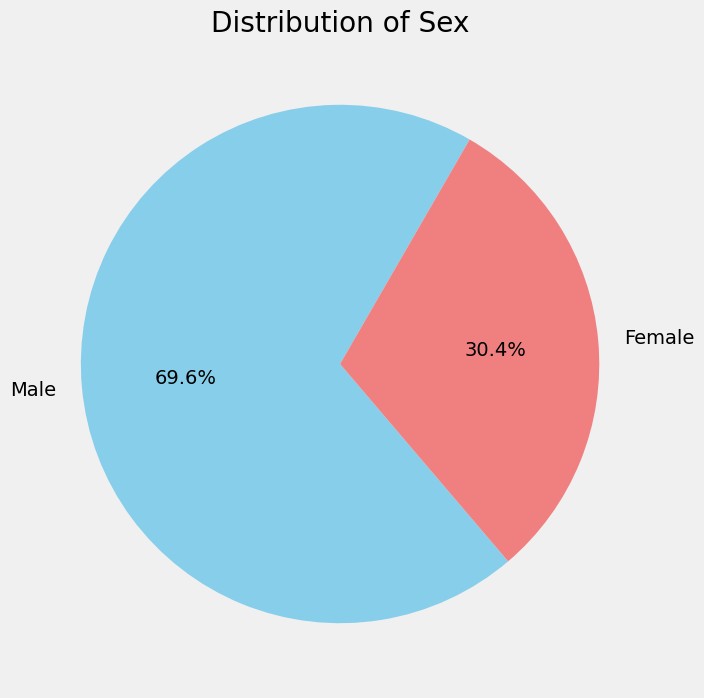

In [ ]:
plt.figure(figsize=(8, 8))
sex_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=60, labels=sex_counts.index)
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

*The above graph indicates the distribution of sex in the dataset: there are 713 males (69.6%) and 312 females (30.4%).*

In [ ]:
# Categorize ages into 'Younger', 'Middle', 'Older'
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, float('inf')], labels=['Younger', 'Middle', 'Older'])
# Count the occurrences of each sex
age_group_counts = df['age_group'].value_counts()

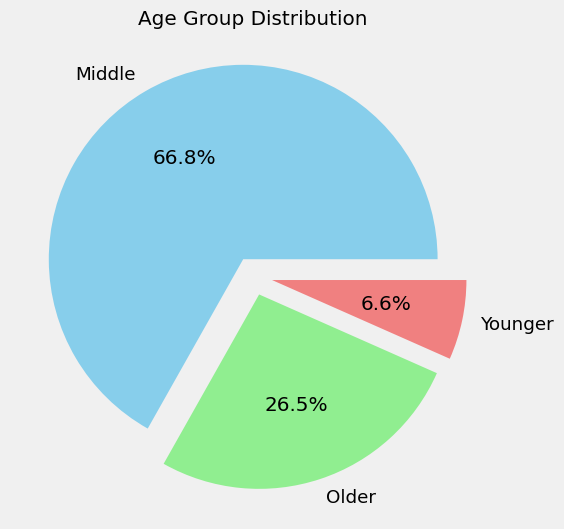

In [ ]:
plt.style.use('fivethirtyeight')
colors=['skyblue', 'lightgreen', 'lightcoral']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(8, 6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Age Group Distribution')
plt.show()

*The above graph indicates the distribution of age groups in the dataset: there are 6.6% individuals in the 'Younger' group, 66.8% individuals in the 'Middle' group, and 26.5% individuals in the 'Older' group.*

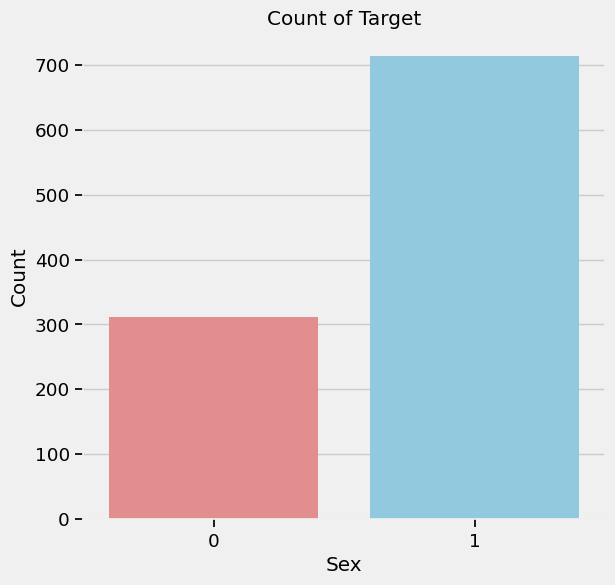

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df, palette=['lightcoral','skyblue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Target')
plt.show()

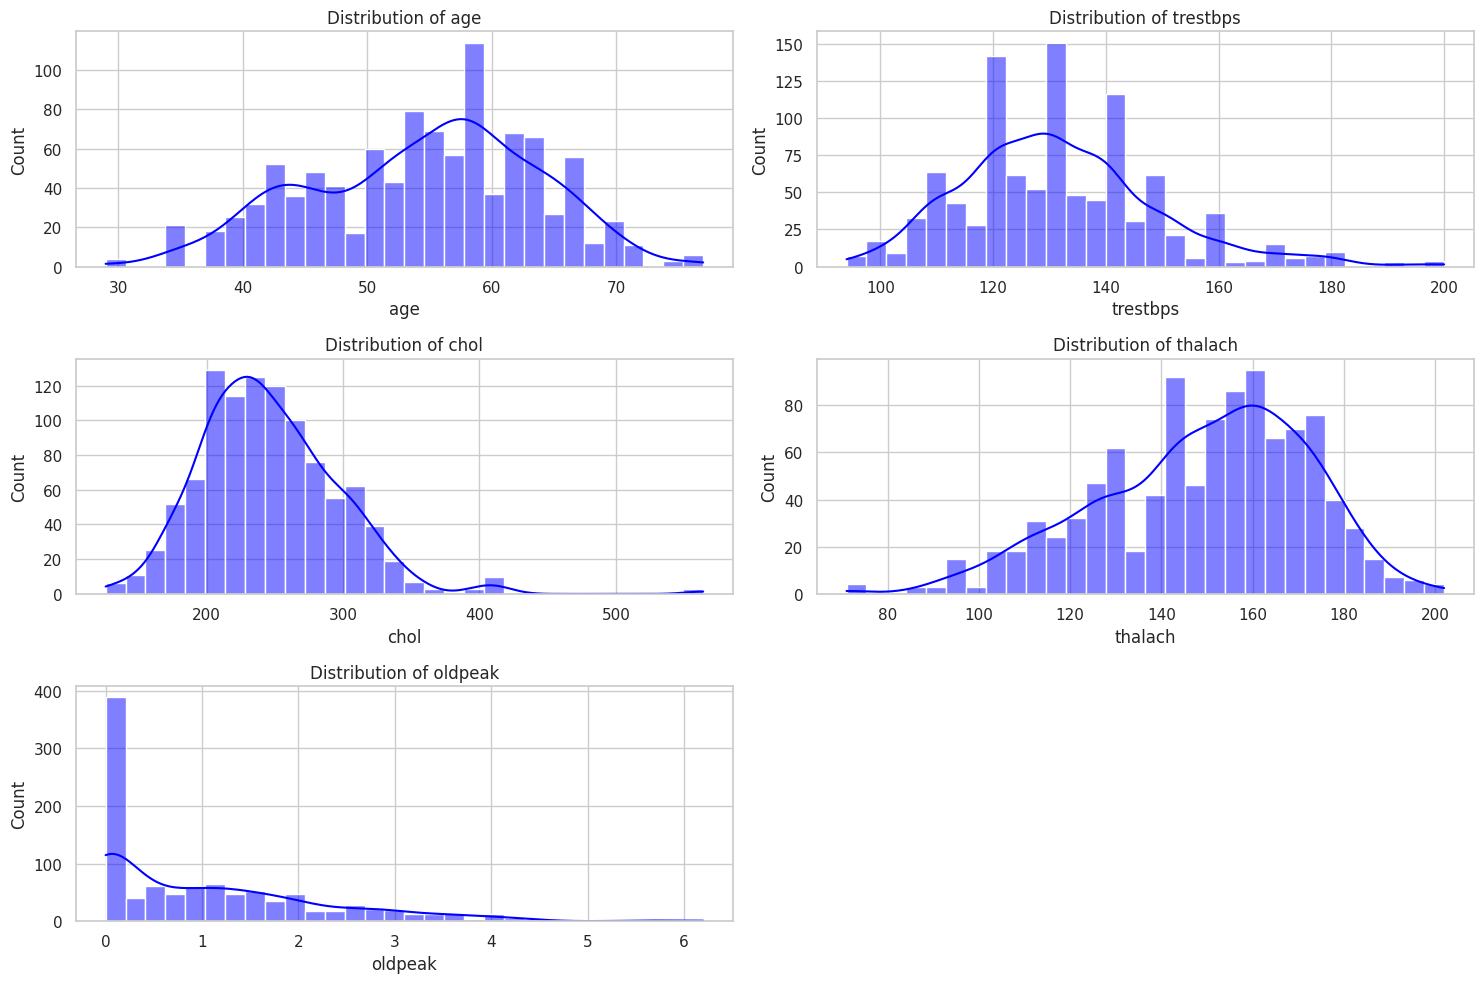

In [ ]:
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot distribution of continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
  plt.subplot(3, 2, i + 1)
  sns.histplot(df[var], kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

**The distributions of the continuous variables show that:**

* *Age has a normal distribution, with most patients between 50 and 60 years old.*
* *Resting blood pressure (trestbps) peaks around 120-140 mmHg.*
* *Cholesterol (chol) shows a right-skewed distribution, with most values between 200 and 300 mg/dL.*
* *Maximum heart rate (thalach) is normally distributed, peaking around 150 bpm.*
* *Oldpeak (ST depression induced by exercise) shows a right-skewed distribution, with most values between 0 and 1.*

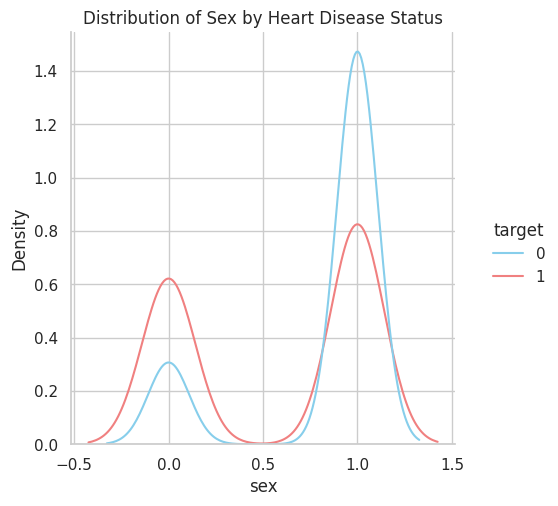

In [ ]:
sns.displot(x='sex', hue='target', data=df, palette=['skyblue', 'lightcoral'], kind='kde')
plt.title('Distribution of Sex by Heart Disease Status')

plt.show()

*The above graph reveals distinct distribution patterns for males and females with and without heart disease, highlighting gender differences in the presence of heart disease.*

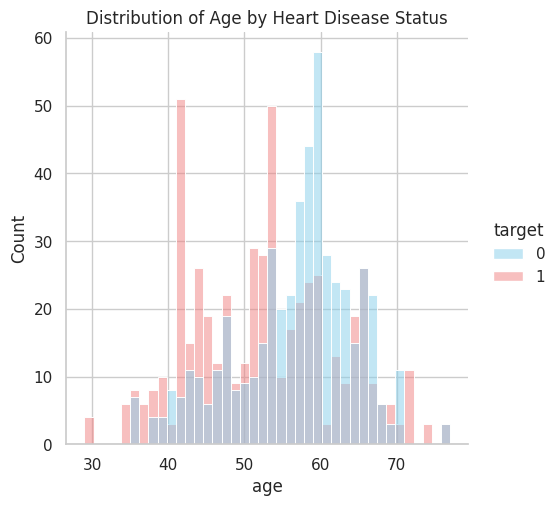

In [ ]:
sns.displot(x='age', hue='target', data=df, palette=['skyblue', 'lightcoral'], bins=int(200/5))
plt.title('Distribution of Age by Heart Disease Status')
plt.show()

*The above graph shows that heart disease prevalence varies with age, with a higher concentration of heart disease in certain age groups, particularly those between 50 and 60 years old.*

In [ ]:
# Drop the columns
columns_to_drop = ['sex_label', 'age_group']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
corr_matrix['target']

,target
age,-0.229324
sex,-0.279501
cp,0.434854
trestbps,-0.138772
chol,-0.099966
fbs,-0.041164
restecg,0.134468
thalach,0.422895
exang,-0.438029
oldpeak,-0.438441


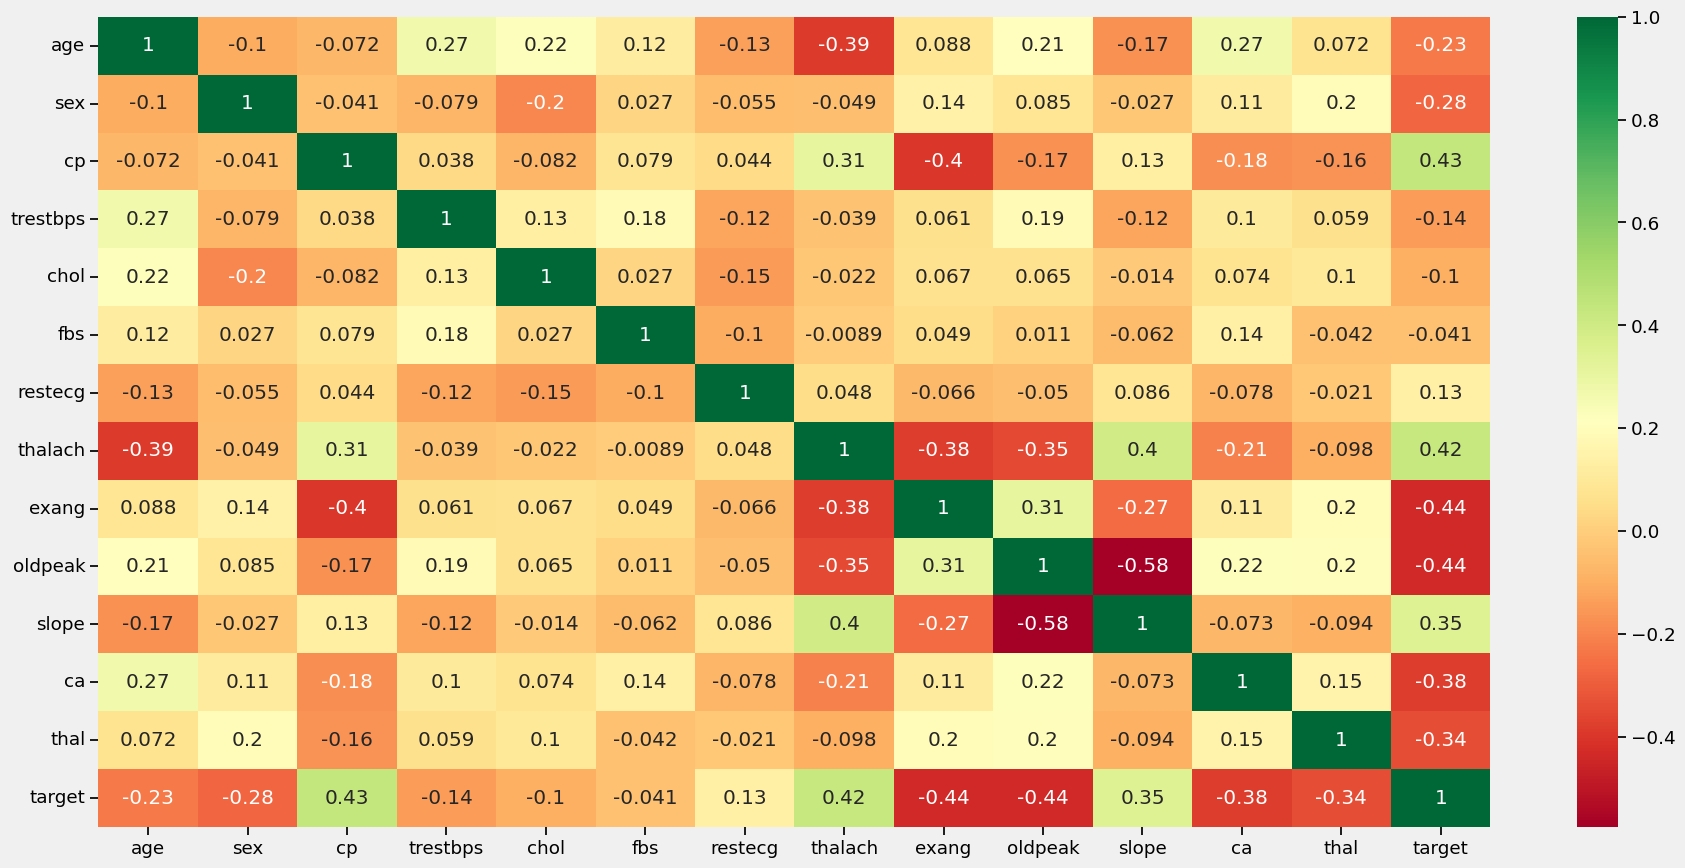

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

*The correlation heatmap shows the relationships between different variables. In simple terms, it highlights that the strongest positive correlation with the target variable (heart disease) is with cp (chest pain type), while the strongest negative correlations are with exang (exercise-induced angina) and oldpeak (ST depression).*

# **Machine Learning**

**Preprocessing and Data Splitting**

In [ ]:
x = df.drop(columns=['target'])
y = df['target']

In [ ]:
# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',
'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
 transformers=[
 ('num', numerical_transformer, numerical_cols),
 ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=35)

* **Logistic Regression**



In [ ]:
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',LogisticRegression())])
logistic_regression_pipeline.fit(x_train, y_train)
y_pred_lr = logistic_regression_pipeline.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall:{recall_lr:.2f}, F1-Score: {f1_lr:.2f}")

Logistic Regression - Accuracy: 0.85, Precision: 0.84, Recall:0.87, F1-Score: 0.85


* **Decision Tree**




In [ ]:
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',DecisionTreeClassifier())])
decision_tree_pipeline.fit(x_train, y_train)
y_pred_dt = decision_tree_pipeline.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f},F1-Score: {f1_dt:.2f}")

Decision Tree - Accuracy: 0.95, Precision: 0.97, Recall: 0.94,F1-Score: 0.95


* **Random Forest**

In [ ]:
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',RandomForestClassifier())])
random_forest_pipeline.fit(x_train, y_train)
y_pred_rf = random_forest_pipeline.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f},F1-Score: {f1_rf:.2f}")

Random Forest - Accuracy: 0.96, Precision: 0.97, Recall: 0.95,F1-Score: 0.96


* **Support Vector Machine (SVM)**

In [ ]:
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))])
svm_pipeline.fit(x_train, y_train)
y_pred_svm = svm_pipeline.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f},F1-Score: {f1_svm:.2f}")


SVM - Accuracy: 0.87, Precision: 0.88, Recall: 0.87,F1-Score: 0.87


* **Gradient Boosting**

In [ ]:
gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',GradientBoostingClassifier())])
gradient_boosting_pipeline.fit(x_train, y_train)
y_pred_gb = gradient_boosting_pipeline.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}, Precision: {precision_gb:.2f}, Recall:{recall_gb:.2f}, F1-Score: {f1_gb:.2f}")

Gradient Boosting - Accuracy: 0.94, Precision: 0.96, Recall:0.92, F1-Score: 0.94


* Accuracy: All models performed reasonably well, with Decision Tree & Random Forest achieving the highest accuracy.
* Precision: Decision Tree, Random Forest &  Gradient Boosting have the highest precision, indicating they are better at predicting heart disease without many false positives.
* Recall: Random Forest has the highest recall, meaning it is better at identifying actual heart disease cases.
* F1-Score: Decision Tree & Random Forest has the highest F1-score, indicating a good balance between precision and recall.

# **ROC Curves**

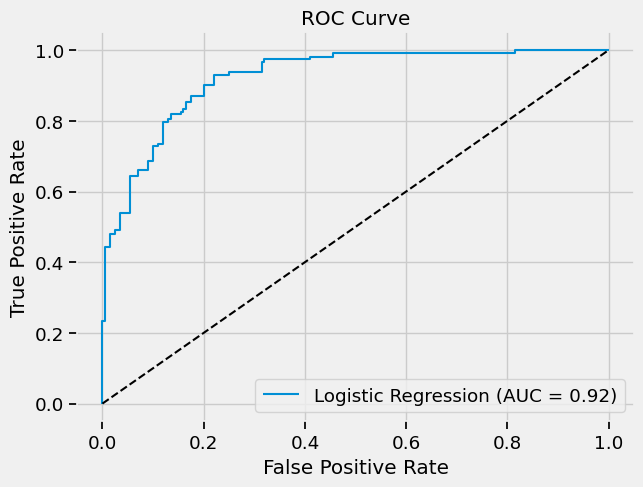

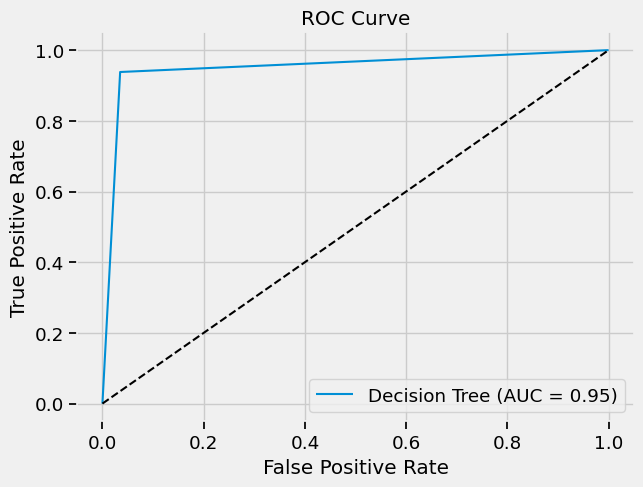

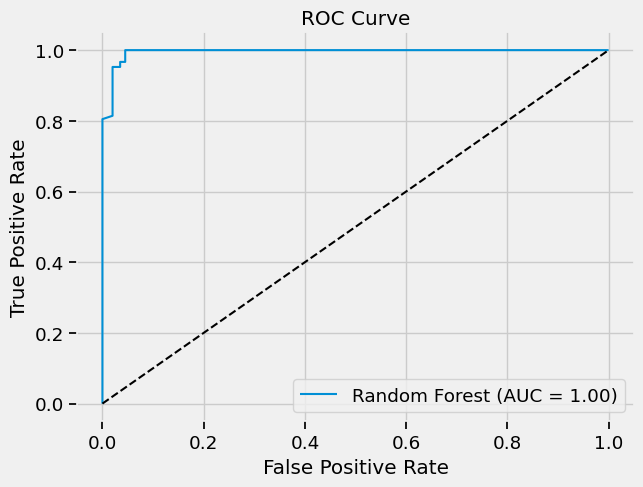

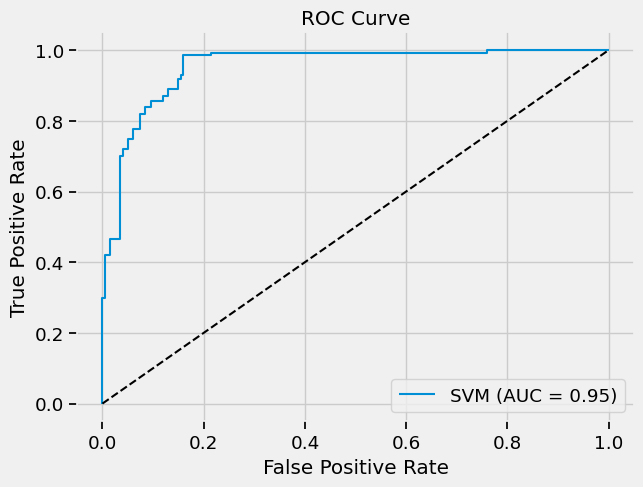

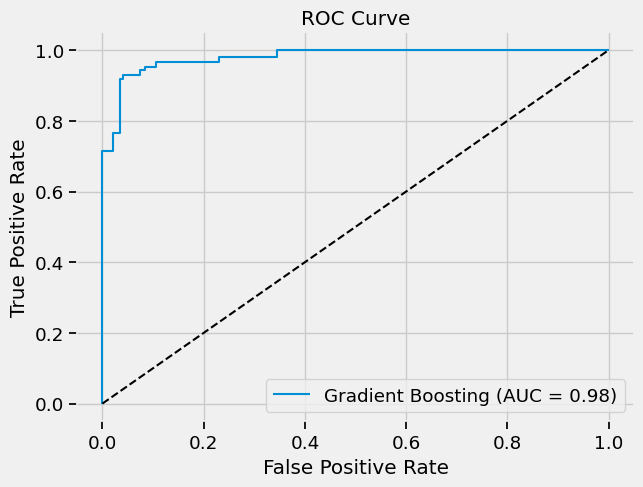

In [ ]:
for model_name, model in [("Logistic Regression", logistic_regression_pipeline), ("Decision Tree",
decision_tree_pipeline), ("Random Forest", random_forest_pipeline), ("SVM", svm_pipeline),
("Gradient Boosting", gradient_boosting_pipeline)]:
 if hasattr(model, "predict_proba"):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
 plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve')
 plt.legend()
 plt.show()

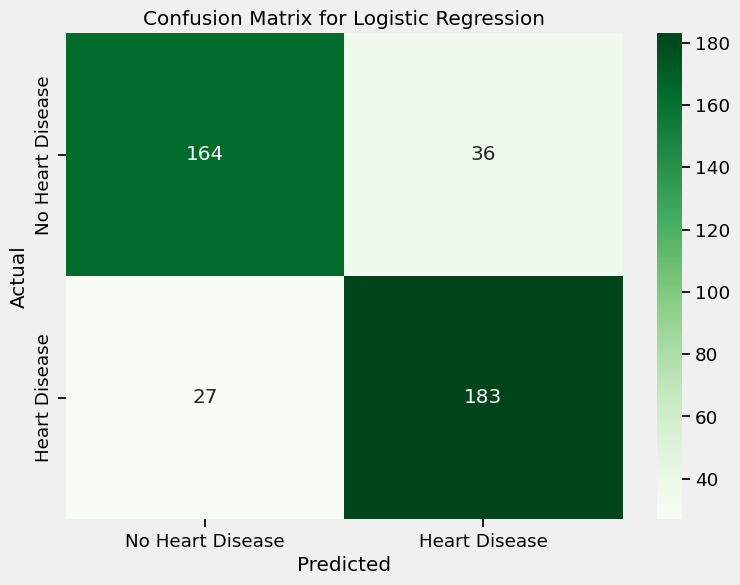

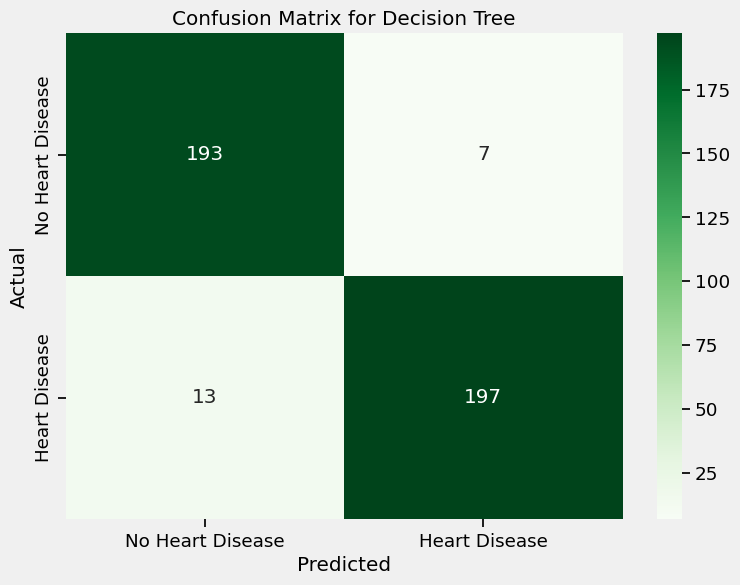

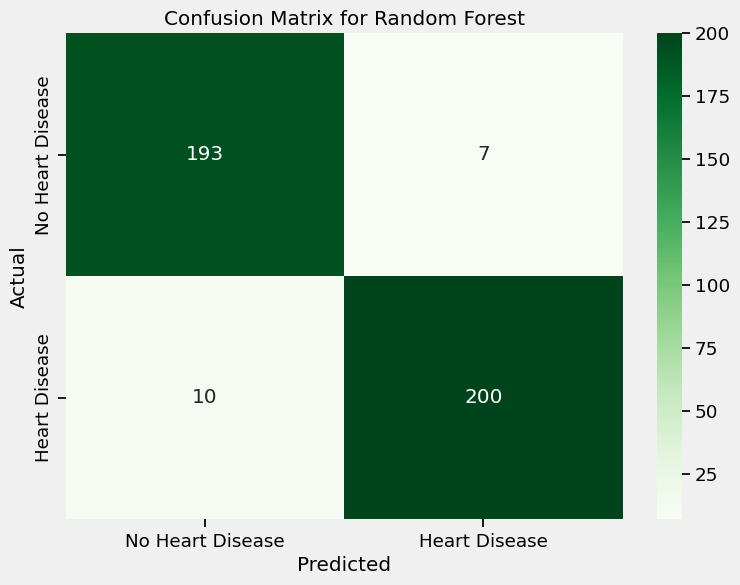

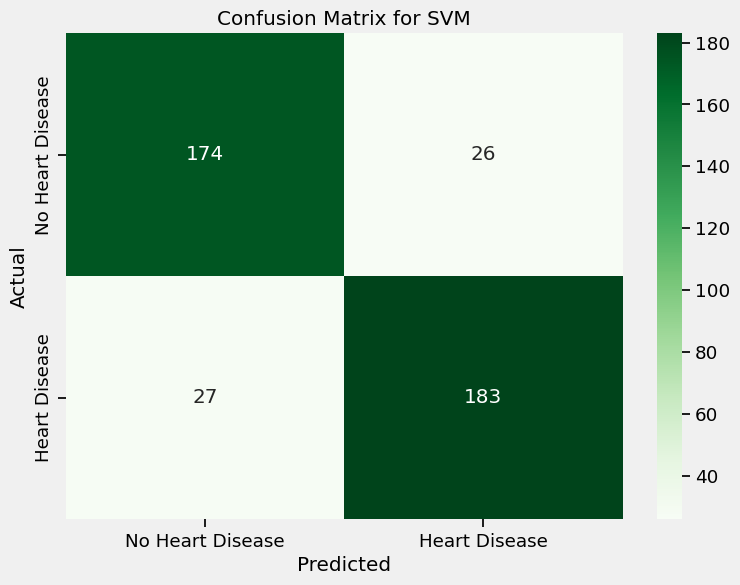

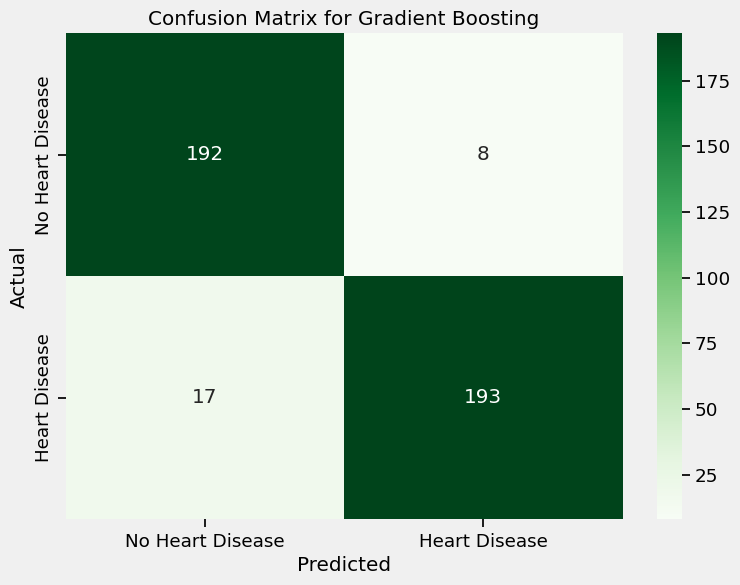

In [ ]:
for model_name, y_pred in [("Logistic Regression", y_pred_lr), ("Decision Tree", y_pred_dt),
("Random Forest", y_pred_rf), ("SVM", y_pred_svm), ("Gradient Boosting", y_pred_gb)]:
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
 xticklabels=['No Heart Disease', 'Heart Disease'],
 yticklabels=['No Heart Disease', 'Heart Disease'])
 plt.title(f'Confusion Matrix for {model_name}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

## **Conclusion:**

  * The heart disease prediction model developed through this project is a powerful tool for early diagnosis. By leveraging machine learning techniques, we can significantly aid medical professionals in making informed decisions, ultimately improving patient outcomes. The insights gained from this project highlight the importance of certain features in predicting heart disease, and the balanced dataset ensures reliable performance. Future work can enhance the model further, making it even more valuable in a clinical setting.

## **Healthcare Implications:**

  *  Regular screening for heart disease is crucial, especially for those between Middle-aged 50 and 60 years old.

  *  Monitoring and managing cholesterol, blood pressure, and exercise-induced ST depression can be effective preventative measures.

  *  Utilizing predictive models like Random Forest and Decision Tree can help in early detection and timely intervention for heart disease, potentially improving patient outcomes.